In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np

# Import the requests library.
import requests

# Import the API Key.
from config import weather_api_keys

# Import the time library and the datetime module from the datetime library:
import time
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(len(cities))

633


In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beggining of the logging.
print("Beggining Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count = set_count + 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count = record_count + 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_desc = city_weather["weather"][0]["description"]
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp, 
                          "Humidity": city_humidity, 
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind, 
                          "Country": city_country, 
                          "Current Description": city_weather_desc
                         })

# If an error is experienced, skip the city.
    except:
        print("City '" + city.title() + "' not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beggining Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | jiexiu
Processing Record 4 of Set 1 | barentsburg
City 'Barentsburg' not found. Skipping...
Processing Record 5 of Set 1 | suleja
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | nizhneyansk
City 'Nizhneyansk' not found. Skipping...
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | harper
Processing Record 16 of Set 1 | calvinia
Processing Record 17 of Set 1 | saint-jean-port-joli
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | comodoro rivadavia
Processing Record 20 of Set 1 | amderma
City 'Amderma' not f

Processing Record 35 of Set 4 | carupano
Processing Record 36 of Set 4 | lompoc
Processing Record 37 of Set 4 | zabol
Processing Record 38 of Set 4 | elvas
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | porbandar
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | verin
Processing Record 43 of Set 4 | chitrakonda
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | colquechaca
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | rudnichnyy
Processing Record 48 of Set 4 | susanville
Processing Record 49 of Set 4 | butaritari
Processing Record 50 of Set 4 | leningradskiy
Processing Record 1 of Set 5 | loa janan
Processing Record 2 of Set 5 | koboko
Processing Record 3 of Set 5 | jieshi
Processing Record 4 of Set 5 | paamiut
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | sangar
Processing Record 8 of Set 5 | moron
Processing Record 9 of 

Processing Record 21 of Set 8 | proletariy
Processing Record 22 of Set 8 | tuy hoa
Processing Record 23 of Set 8 | jalu
Processing Record 24 of Set 8 | sambava
Processing Record 25 of Set 8 | ngunguru
Processing Record 26 of Set 8 | kroya
Processing Record 27 of Set 8 | ekibastuz
Processing Record 28 of Set 8 | palabuhanratu
City 'Palabuhanratu' not found. Skipping...
Processing Record 29 of Set 8 | iguape
Processing Record 30 of Set 8 | ipubi
Processing Record 31 of Set 8 | hasaki
Processing Record 32 of Set 8 | gairo
Processing Record 33 of Set 8 | yarmouth
Processing Record 34 of Set 8 | luanda
Processing Record 35 of Set 8 | nipawin
Processing Record 36 of Set 8 | san ramon
Processing Record 37 of Set 8 | flin flon
Processing Record 38 of Set 8 | tomatlan
Processing Record 39 of Set 8 | maldonado
Processing Record 40 of Set 8 | san blas
Processing Record 41 of Set 8 | vaitupu
City 'Vaitupu' not found. Skipping...
Processing Record 42 of Set 8 | dillon
Processing Record 43 of Set 8 

Processing Record 4 of Set 12 | saleaula
City 'Saleaula' not found. Skipping...
Processing Record 5 of Set 12 | znamenskoye
Processing Record 6 of Set 12 | port hardy
Processing Record 7 of Set 12 | los llanos de aridane
Processing Record 8 of Set 12 | agadez
Processing Record 9 of Set 12 | juegang
Processing Record 10 of Set 12 | san carlos de bariloche
Processing Record 11 of Set 12 | sabha
Processing Record 12 of Set 12 | georgiyevskaya
Processing Record 13 of Set 12 | san juan
Processing Record 14 of Set 12 | ewa beach
Processing Record 15 of Set 12 | aklavik
Processing Record 16 of Set 12 | olafsvik
Processing Record 17 of Set 12 | lagoa
Processing Record 18 of Set 12 | kaili
Processing Record 19 of Set 12 | san policarpo
Processing Record 20 of Set 12 | andevoranto
City 'Andevoranto' not found. Skipping...
Processing Record 21 of Set 12 | samarai
Processing Record 22 of Set 12 | nabire
Processing Record 23 of Set 12 | catamarca
Processing Record 24 of Set 12 | tommot
Processing R

In [7]:
# Convert the array of dictionries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description
0,Hilo,19.7297,-155.0900,73.13,90,75,4.61,US,broken clouds
1,Rikitea,-23.1203,-134.9692,77.14,75,3,9.24,PF,clear sky
2,Jiexiu,37.0244,111.9125,26.37,46,100,11.65,CN,overcast clouds
3,Suleja,9.1758,7.1808,67.19,18,6,4.25,NG,clear sky
4,Albany,42.6001,-73.9662,28.56,74,9,3.85,US,clear sky


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Import time module.
import time

# Import matplotlib.
import matplotlib.pyplot as plt

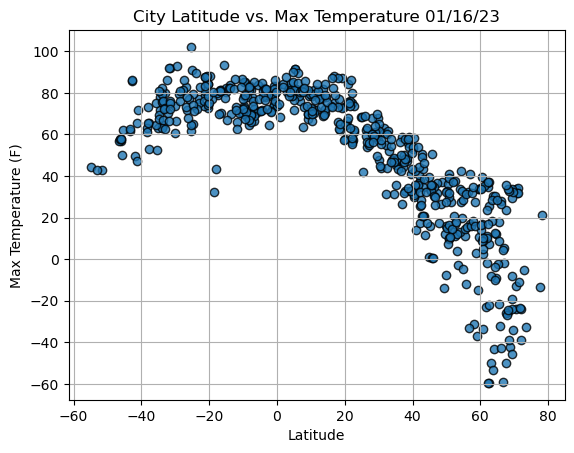

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show the plot.
plt.show()

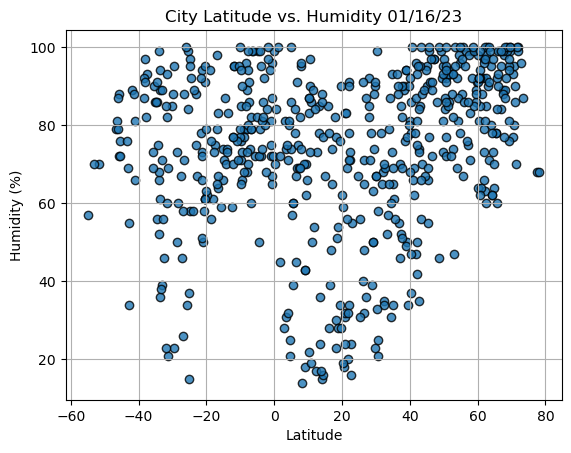

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

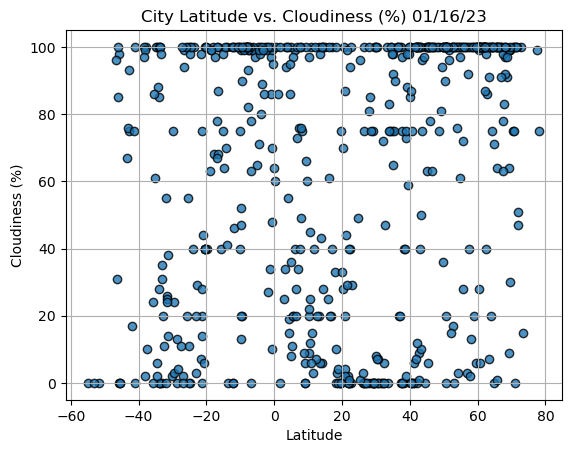

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

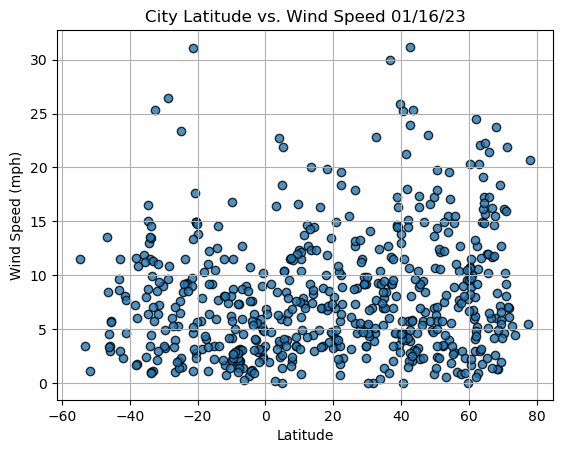

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description
0,Hilo,19.7297,-155.0900,73.13,90,75,4.61,US,broken clouds
2,Jiexiu,37.0244,111.9125,26.37,46,100,11.65,CN,overcast clouds
3,Suleja,9.1758,7.1808,67.19,18,6,4.25,NG,clear sky
4,Albany,42.6001,-73.9662,28.56,74,9,3.85,US,clear sky
6,Bathsheba,13.2167,-59.5167,77.61,78,20,9.22,BB,light rain


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

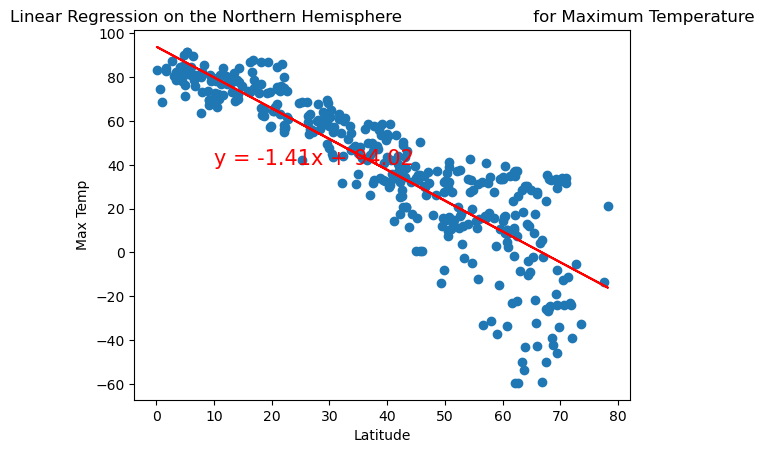

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

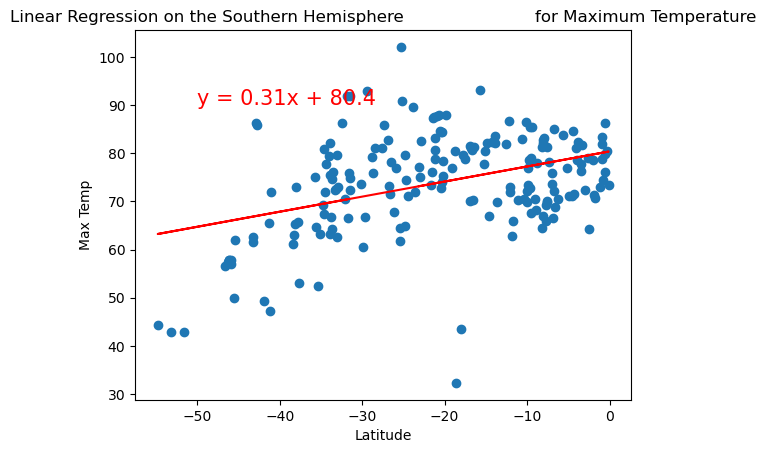

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

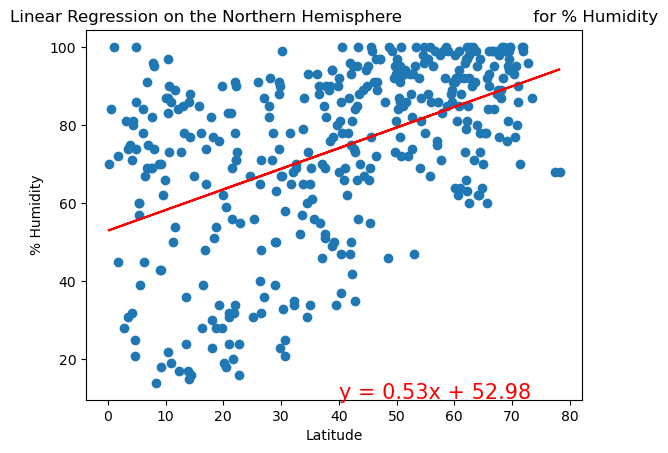

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

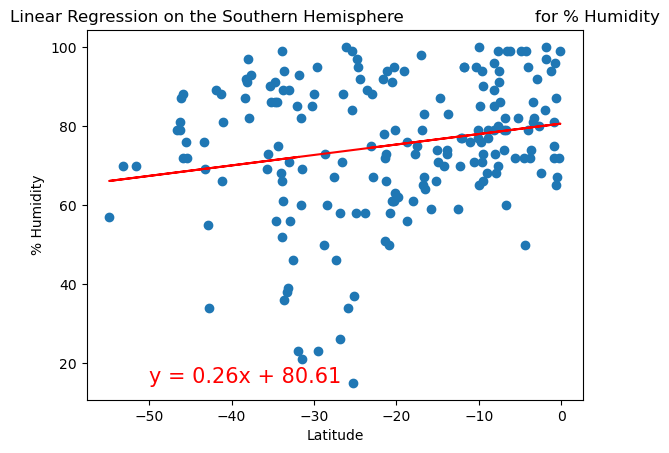

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

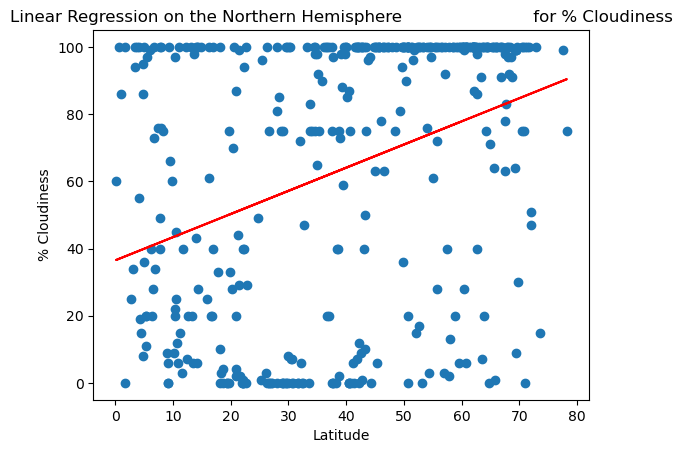

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

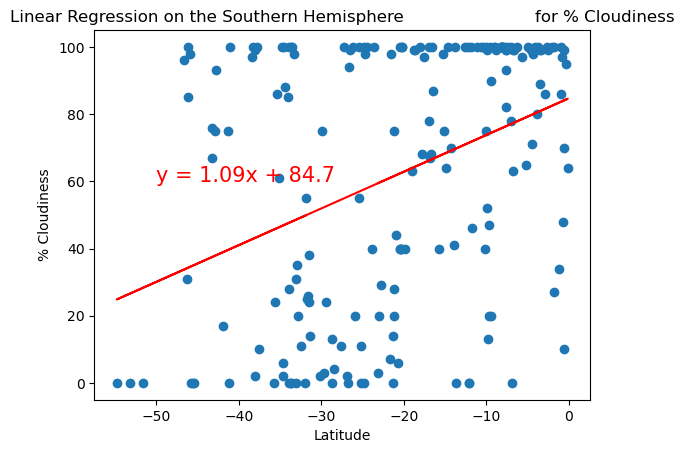

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

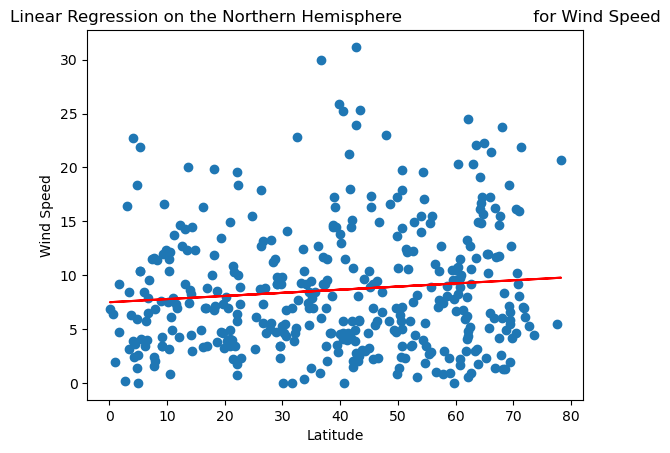

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

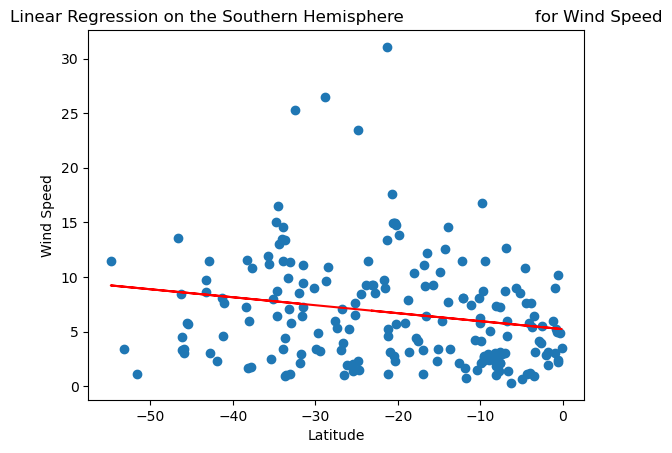

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))